In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step-1 Load And Explore Data The Dataset

In [6]:
dataset = pd.read_csv(r"C:\Users\asus\Downloads\GooglePlayStore_DataAnalysis-main\GooglePlayStore_DataAnalysis-main\googleplaystore.csv")

In [11]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
dataset.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2193,Kids Balloon Pop Game Free 🎈,FAMILY,4.1,38021,19M,"10,000,000+",Free,0,Everyone,Casual;Music & Video,"July 6, 2018",18.2,4.0.3 and up
959,Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11M,"10,000,000+",Free,0,Teen,Entertainment,"July 15, 2018",2.13.5,4.1 and up
7175,Disc Label Print,TOOLS,3.0,262,37M,"10,000+",Free,0,Everyone,Tools,"September 20, 2016",1.0.0,4.0 and up
6868,BV MAAp,BUSINESS,NaN,9,4.2M,100+,Free,0,Everyone,Business,"December 4, 2015",1.1.3,4.1 and up
2053,Educational Games for Kids,FAMILY,4.5,7050,24M,"1,000,000+",Free,0,Everyone,Educational;Education,"May 27, 2018",2,4.0 and up
7045,Berner Zeitung,NEWS_AND_MAGAZINES,3.4,736,8.5M,"50,000+",Free,0,Teen,News & Magazines,"August 3, 2018",7.5.9.1,4.1 and up
5311,AK Math Coach,FAMILY,3.6,283,18M,"50,000+",Free,0,Everyone,Education,"May 19, 2015",1.3,2.3.3 and up
1152,GoBank,FINANCE,4.4,5950,12M,"500,000+",Free,0,Everyone,Finance,"June 1, 2018",2.131,4.1 and up
4035,FRONTLINE COMMANDO: D-DAY,GAME,4.5,1736105,14M,"10,000,000+",Free,0,Mature 17+,Action,"May 16, 2014",3.0.4,2.1 and up
5090,Ag Tools,TOOLS,NaN,2,18M,"1,000+",Free,0,Everyone,Tools,"September 27, 2017",1,4.0.3 and up


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
dataset["Price"] = dataset["Price"].str.replace("Everyone", "0")
dataset["Price"] = dataset["Price"].str.replace(r"[^\d.]", "", regex = True)
dataset["Price"] = pd.to_numeric(dataset["Price"], errors = 'coerce')

In [20]:
dataset['Installs'] = dataset["Installs"].str.replace("Free","0")
dataset["Installs"] = dataset["Installs"].str.replace(r"[+,]", "",regex = True)
dataset["Installs"] = pd.to_numeric(dataset["Installs"], errors = 'coerce')

In [22]:
dataset["Last Updated"] = pd.to_datetime(dataset["Last Updated"], errors = 'coerce')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [25]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [32]:
dataset["Rating"].fillna(dataset["Rating"].median(), inplace = True)
dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace= True)
dataset["Type"].fillna(dataset["Type"].mode()[0], inplace = True)
dataset["Content Rating"].fillna(dataset["Content Rating"].mode()[0], inplace = True)
dataset["Current Ver"].fillna(dataset["Current Ver"].mode()[0], inplace = True)
dataset["Android Ver"].fillna(dataset["Android Ver"].mode()[0], inplace = True)

C:\Users\asus\AppData\Local\Temp\ipykernel_39144\2376636976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Last Updated"].fillna(dataset["Last Updated"].mode()[0], inplace= True)
C:\Users\asus\AppData\Local\Temp\ipykernel_39144\2376636976.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  object        
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [36]:
dataset.isnull().sum()   

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# 3.Remove Duplicates--> using-<

In [37]:
dataset.duplicated().sum()

np.int64(483)

In [42]:
dataset = dataset.drop_duplicates(keep='first')

In [43]:
dataset.duplicated().sum()

np.int64(0)

In [45]:
dataset.describe()

,Rating,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,10358.000000,10358
mean,4.205165,1.415639e+07,1.030701,2017-11-14 10:01:41.486773504
min,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,19.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.506868,8.023580e+07,16.277843,NaN


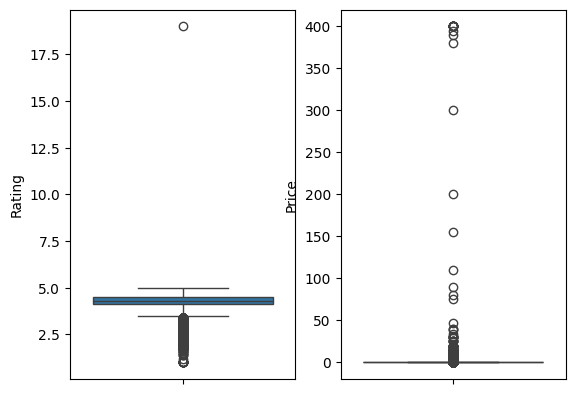

In [47]:
plt.subplot(1,2,1)
sns.boxplot(dataset["Rating"])
plt.subplot(1,2,2)
sns.boxplot(dataset["Price"])
plt.show()

In [50]:
(dataset["Rating"]>5).sum()

np.int64(1)

In [52]:
dataset = dataset[dataset["Rating"]<=5]

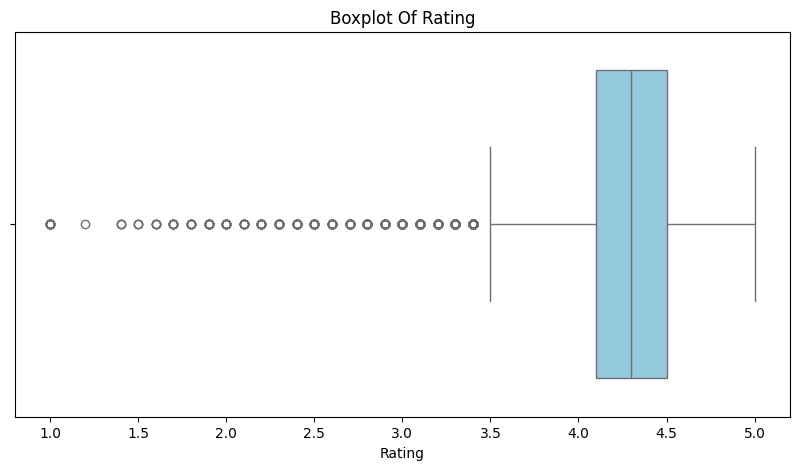

In [54]:
# plt.subplot(1,2,1)
# sns.boxplot(dataset["Rating"])
# plt.show()
#OR
plt.figure(figsize = (10,5))
sns.boxplot(x = dataset["Rating"], color = "skyblue")
plt.title("Boxplot Of Rating")
plt.show()

In [ ]:
### Capping of Price Column outliers using percentile methoed

In [56]:
upper_limit = dataset["Price"].quantile(0.95)
upper_limit

np.float64(1.99)

In [ ]:
dataset["Price"] = dataset["Price"].clip(upper=upper_limit)

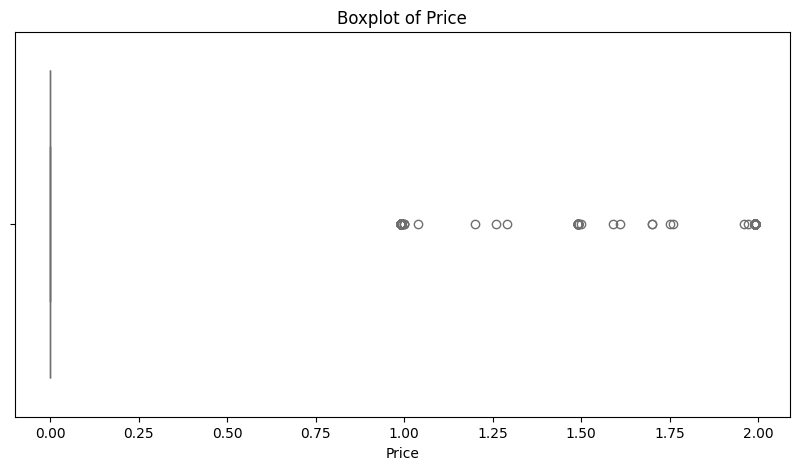

In [60]:
plt.figure(figsize = (10,5))
sns.boxplot(x = dataset["Price"], color = "skyblue")
plt.title("Boxplot of Price")
plt.show()

In [ ]:
# Step-3 Business Question For analysis.

In [69]:
Avg_rating = dataset["Rating"].mean()
print(f"Average Rating of apps on the play Store: {Avg_rating:.2f}")

Average Rating of apps on the play Store: 4.20


In [78]:
Total_apps = dataset.shape[0]  #shape-> Given the no of rows
Free_Apps = dataset[dataset["Type"]=="Free"].shape[0]
Paid_Apps = dataset[dataset["Type"]=="Paid"].shape[0]

Free_Apps_percentages = (Free_Apps/Total_apps)*100
Paid_Apps_percentages = (Paid_Apps/Total_apps)*100

print(f"Free_Apps_percentages is: {Free_Apps_percentages:.2f}")
print(f"Paid_Apps_percentages is: {Paid_Apps_percentages:.2f}")

Free_Apps_percentages is: 92.61
Paid_Apps_percentages is: 7.39


In [79]:
most_common_app_category = dataset["Category"].value_counts()
most_common_app_category

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

In [85]:
most_common_app_category_name = dataset["Category"].value_counts().idxmax()
print(f"most_common_app_category:{most_common_app_category_name}")

most_common_app_category:FAMILY


C:\Users\asus\AppData\Local\Temp\ipykernel_39144\432502525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_app_category.index,y=most_common_app_category.values, palette = 'dark')


Text(0, 0.5, 'Number of Apps')

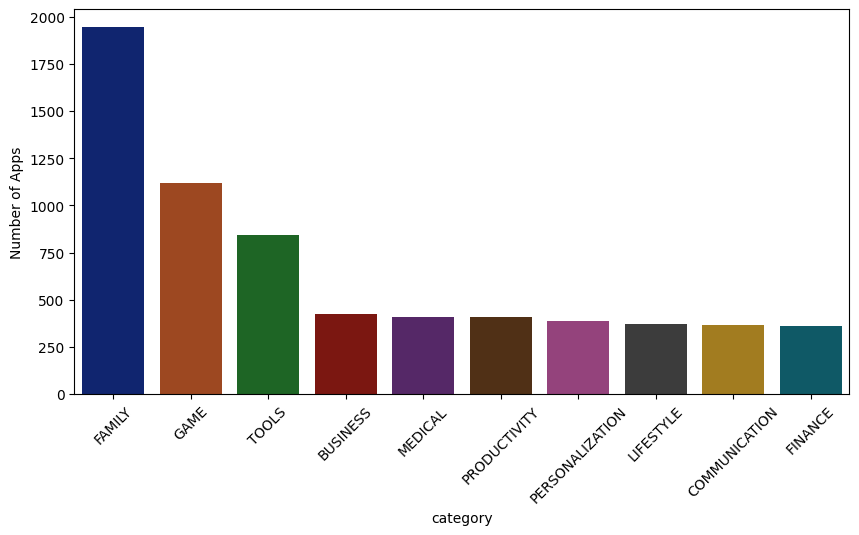

In [97]:
most_common_app_category = dataset["Category"].value_counts().head(10)
plt.figure(figsize =(10,5))
sns.barplot(x=most_common_app_category.index,y=most_common_app_category.values, palette = 'dark')
plt.xticks(rotation=45)
plt.xlabel("category")
plt.ylabel("Number of Apps")

C:\Users\asus\AppData\Local\Temp\ipykernel_39144\630055691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_rating.index,y=content_rating.values, palette= 'dark')


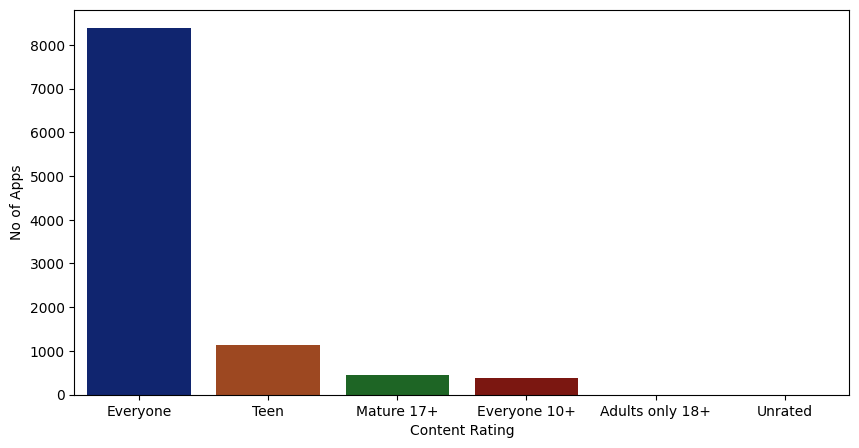

In [102]:
content_rating = dataset["Content Rating"].value_counts().head(10)
plt.figure(figsize = (10,5))
sns.barplot(x=content_rating.index,y=content_rating.values, palette= 'dark')
plt.xlabel("Content Rating")
plt.ylabel("No of Apps")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_39144\2066115862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_app_category.index,y=most_common_app_category.values, palette = 'dark')


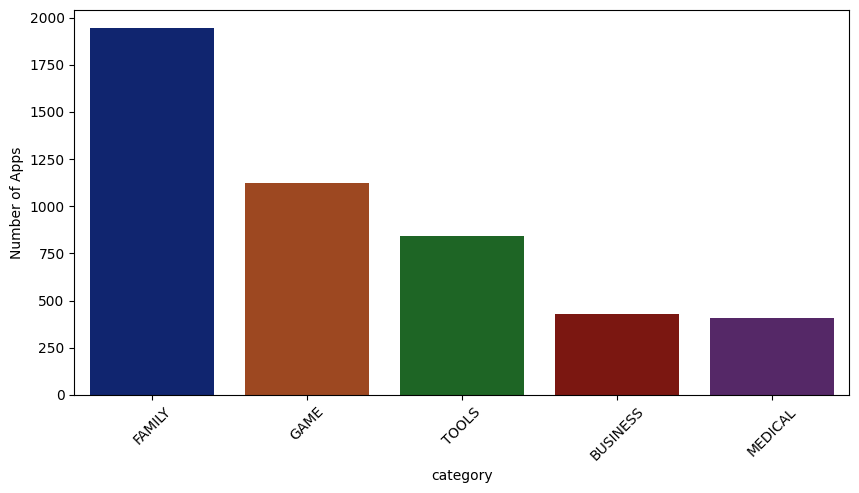

In [105]:
most_common_app_category = dataset["Category"].value_counts().head(5)
plt.figure(figsize =(10,5))
sns.barplot(x=most_common_app_category.index,y=most_common_app_category.values, palette = 'dark')
plt.xticks(rotation=45)
plt.xlabel("category")
plt.ylabel("Number of Apps")
plt.show()

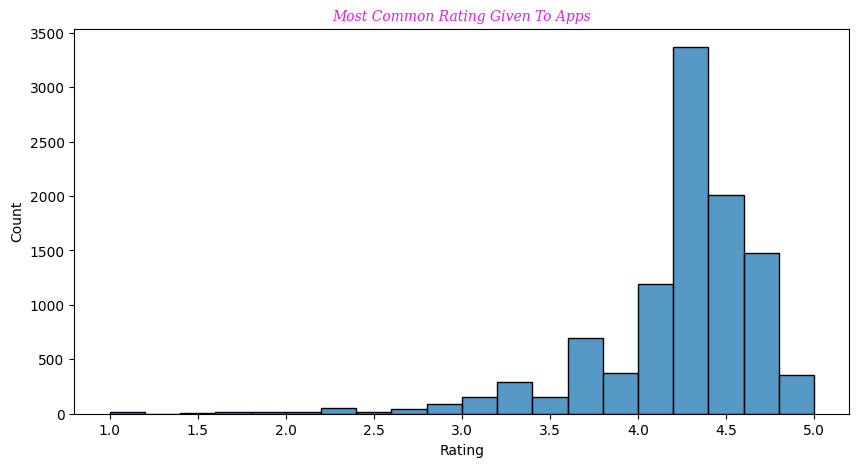

In [117]:
plt.figure(figsize=(10,5))
sns.histplot(dataset["Rating"], bins = 20)
font1 = {'family':'serif','style':'italic','color':'#df20e8','size':10}
plt.title("Most Common Rating Given To Apps", fontdict = font1)
plt.show()

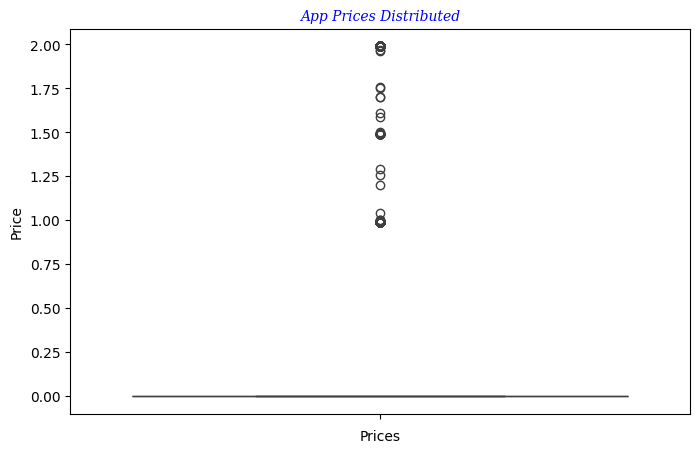

In [123]:
plt.figure(figsize = (8,5))
sns.boxplot(dataset["Price"])
font1 = {'family':'serif','style':'italic', 'color':'blue', 'size':10}
plt.title("App Prices Distributed", fontdict= font1)
plt.xlabel("Prices")
plt.show()

In [125]:
free_apps_avg_rating = dataset[dataset["Type"]== "Free"]["Rating"].mean()
paid_apps_avg_rating = dataset[dataset["Type"]== "Paid"]["Rating"].mean()

print(f"free_apps_avg_rating: {free_apps_avg_rating:.2f}")
print(f"paid_apps_avg_rating: {paid_apps_avg_rating:.2f}")

free_apps_avg_rating: 4.20
paid_apps_avg_rating: 4.27


In [127]:
categories_avg_ratings= dataset.groupby("Category")["Rating"].mean().sort_values(ascending = False)
categories_avg_ratings.head(10)

Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64

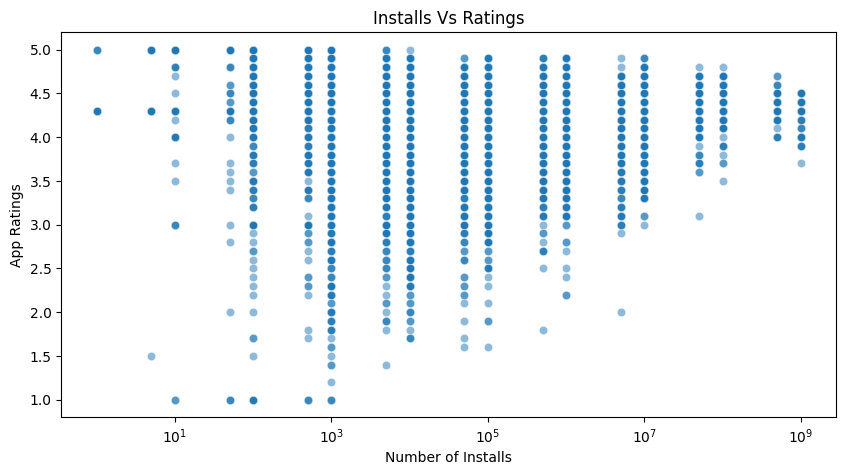

In [139]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset["Installs"], y=dataset["Rating"], alpha=0.5)

plt.xscale("log")  # ✅ Use lowercase "log"
plt.title("Installs Vs Ratings")
plt.xlabel("Number of Installs")
plt.ylabel("App Ratings")
plt.show()

In [144]:
free_install = dataset[dataset["Type"]=="Free"]["Installs"].mean()
paid_install = dataset[dataset["Type"]=="Paid"]["Installs"].mean()

print(f"Avg install of free Apps:{free_install:.2f}")
print(f"paid_install:{paid_install:.2f}")

Avg install of free Apps:15279679.80
paid_install:90491.35


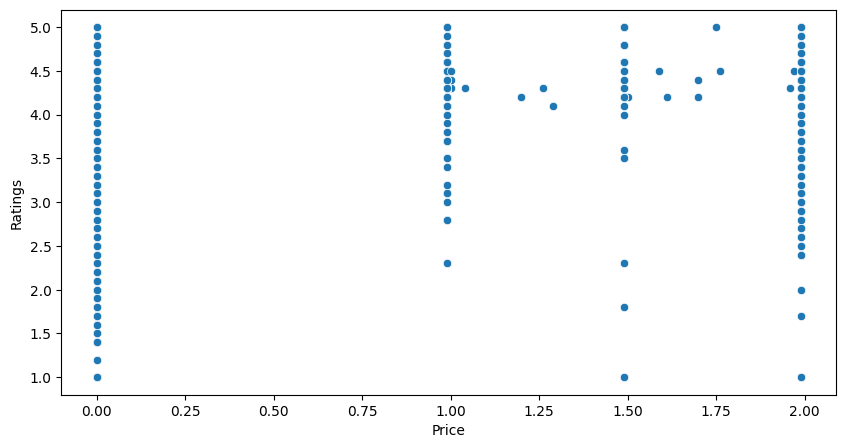

In [147]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=dataset["Price"],y=dataset["Rating"])
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

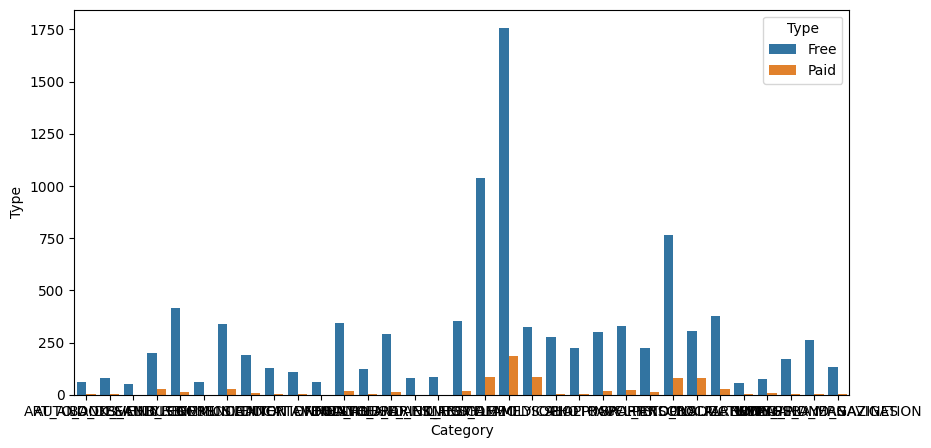

In [149]:
plt.figure(figsize = (10,5))
sns.countplot(x="Category",hue="Type", data=dataset)
plt.xlabel("Category")
plt.ylabel("Type")
plt.rotation()
plt.show()